# Directional Semivariogram

In this tutorial, we will learn about directional semivariograms, how to set the angle of direction, and the tolerance parameter. We compare two neighbor selection methods: triangular, which is fast, and elliptical, which is accurate.

## Prerequisites

- **Domain**:
  - semivariance and covariance functions
- **Package**:
  - `TheoreticalVariogram`, `ExperimentalVariogram`
- **Programming**:
  - Python basics

## Table of contents

1. A directional process.
2. Create directional and isotropic semivariograms.
3. Compare directional semivariograms.
4. Compare triangular vs elliptical neighbors selection methods.

## 1. Directional process

Not every spatial process may be described by isotropic semivariograms. Sometimes we see a specific trend in one direction (N-S, W-E, or NE-SW, NW-SE). `Pyinterpolate` lets us model semivariance in a specific direction, or multiple directions with omnidirectional case. If you want to go straight to the code, then you should check API examples in notebooks (1) `tutorials/api-examples/a-1-2-directional-experimental-variogram` and (2) `tutorials/api-examples/a-1-4-directional-variogram-class`. This guide is more detailed, thus recommeded for users not familiar with the directional semivariogram concept.

> **Note**: if you are a machine learning enthusiast, then you can treat the direction as an additional feature to model semivariance.



## 2. Create directional and isotropic semivariograms

In [1]:
import geopandas as gpd
from pyinterpolate import calculate_semivariance

import matplotlib.pyplot as plt

In [3]:
VALUE_COL = 'PM2.5'
df = gpd.read_file('../data/air_pollution.gpkg', layer='pm2_5')
df.set_index('station_id', inplace=True)

In [4]:
df.head()

,PM2.5,geometry
station_id,,
659,7.12765,POINT (720513.167 300494.94)
736,4.66432,POINT (475344.002 724090.975)
861,3.00739,POINT (526820.46 700473.261)
266,7.10000,POINT (748935.825 383022.087)
355,2.00000,POINT (529001.219 443458.908)


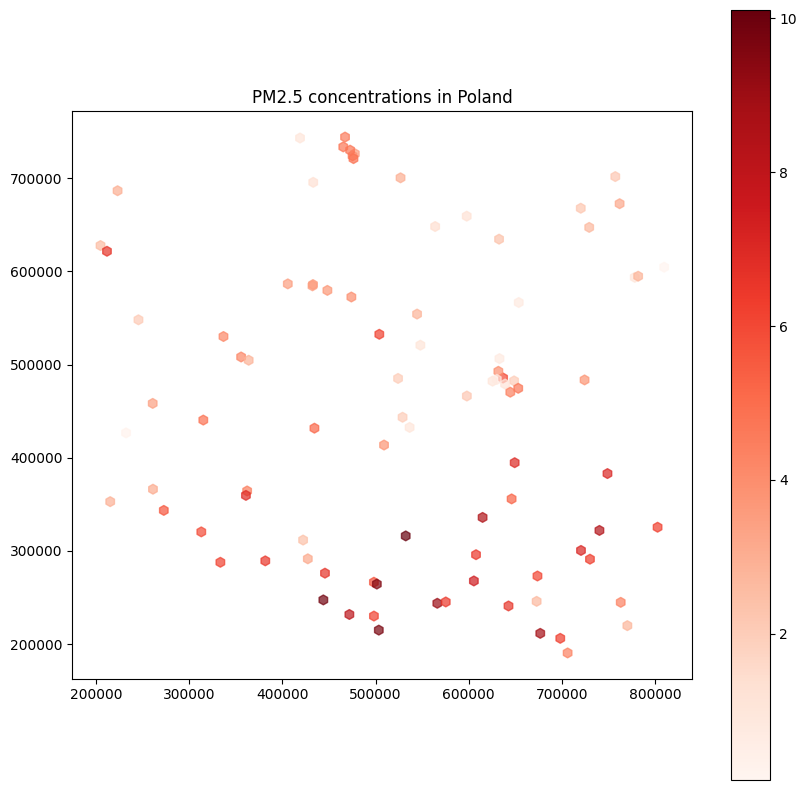

In [5]:
df.plot(figsize=(10, 10), column=VALUE_COL, legend=True, markersize=50, alpha=0.7, marker="h", cmap='Reds')
plt.title('PM2.5 concentrations in Poland')
plt.show()

When we estimate experimental

input_array: numpy array with coordinates and observed values, for example: [[0, 0, 10], [0, 1, 20]],
step_size: we must divide our analysis area into discrete lags. Lags are intervals (usually circular) within which we check if the point has a neighbor. For example, if we look into the lag 500, then we are going to compare one point with other points in a distance (0, 1000] from this point,
max_range: This parameter represents the possible maximum range of spatial dependency. This parameter should be at most half of the extent.
But that's not everything! We didn't use three other parameters:

direction: it is a float in the range [0, 360]. We set the direction of the semivariogram:
0 or 180: is WE direction,
90 or 270 is NS direction,
45 or 225 is NE-SW direction,
135 or 315 is NW-SE direction.
tolerance: it is a float in the range [0, 1]. If we leave tolerance with default 1, we will always get an isotropic semivariogram. Another edge case is if we set tolerance to 0, then points must be placed on a single line with the beginning in the origin of the coordinate system and the angle given by the y-axis and direction parameter. If tolerance is > 0 and < 1, the bin is selected as an elliptical area with a major axis pointed in the same direction as the line for 0 tolerance.
The major axis size is (tolerance * step_size),
The minor axis size is ((1 - tolerance) * step_size),
The baseline point is at the center of the ellipse.
method: it is str with possible values:
t or triangle for triangular neighbors selection which is fast and recommended for a big dataset,
e or ellipse for elliptical neighbors selection which is accurate but slow, recommended for small-size datasets.
The best idea is to visualize it on a cartesian plane: